In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the dataset

# Check for missing values
missing_values = data.isnull().sum()

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], drop_first=True)

# Split the data into features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']


In [3]:
data = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [21]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
# Check for missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

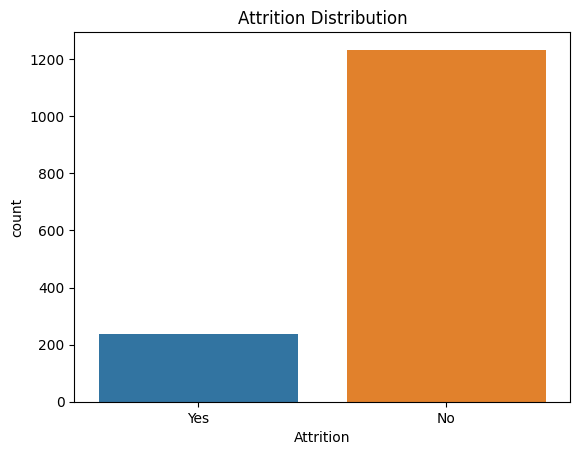

In [8]:
# Visualize the distribution of the target variable (Attrition)
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.show()

<ipython-input-9-5182a6ead5e6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


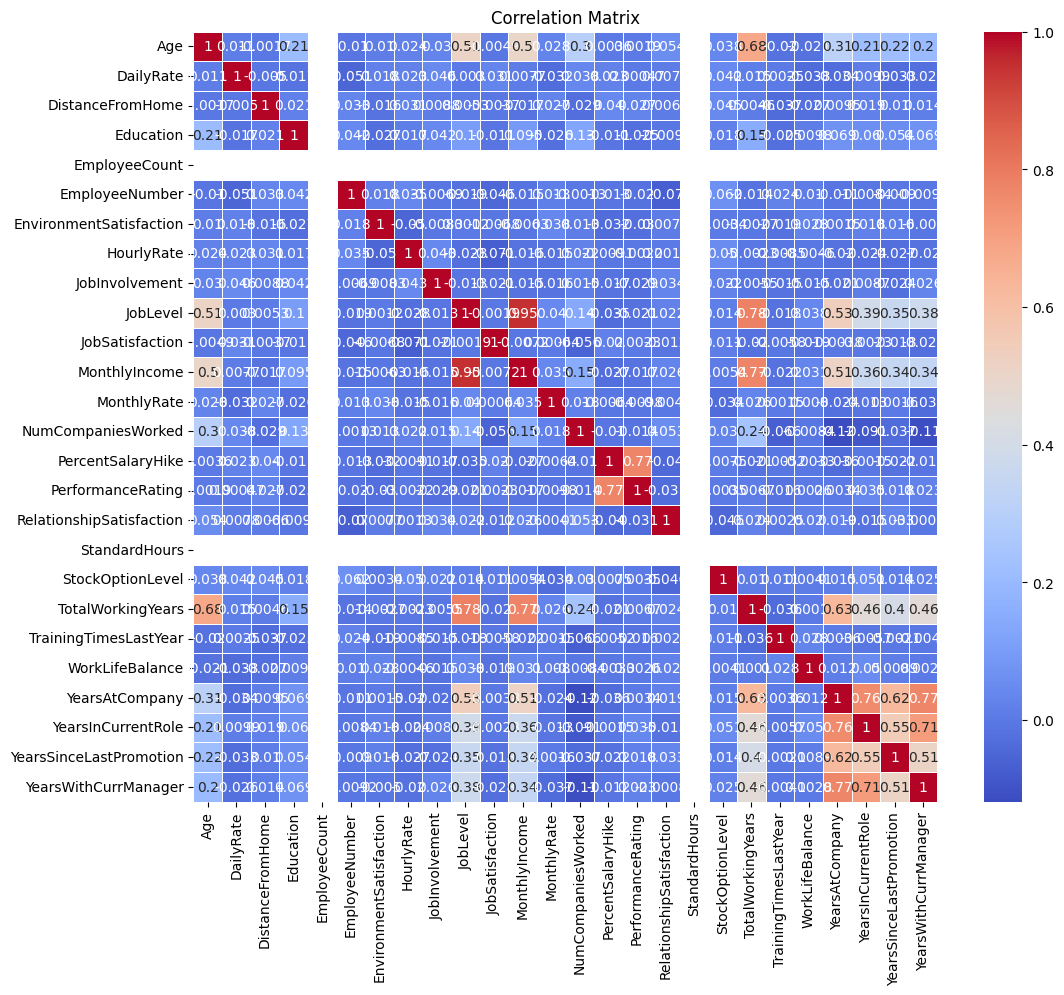

In [9]:
# Visualize the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Calculate Z-scores for numeric columns
z_scores = stats.zscore(data.select_dtypes(include=['int64', 'float64']))
threshold = 3

# Remove rows with outliers
data_no_outliers = data[(z_scores < threshold).all(axis=1)]

In [24]:
data = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'], drop_first=True)

In [25]:
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,Yes,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,1,0,0,1,1
1,49,No,279,8,1,1,2,3,61,2,...,0,0,0,0,1,0,0,1,0,0
2,37,Yes,1373,2,2,1,4,4,92,2,...,1,0,0,0,0,0,0,0,1,1
3,33,No,1392,3,4,1,5,4,56,3,...,0,0,0,0,1,0,0,1,0,1
4,27,No,591,2,1,1,7,1,40,3,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,1,2061,3,41,4,...,1,0,0,0,0,0,0,1,0,0
1466,39,No,613,6,1,1,2062,4,42,2,...,0,0,0,0,0,0,0,1,0,0
1467,27,No,155,4,3,1,2064,2,87,4,...,0,0,1,0,0,0,0,1,0,1
1468,49,No,1023,2,3,1,2065,4,63,2,...,0,0,0,0,0,1,0,1,0,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   Attrition                          1470 non-null   object
 2   DailyRate                          1470 non-null   int64 
 3   DistanceFromHome                   1470 non-null   int64 
 4   Education                          1470 non-null   int64 
 5   EmployeeCount                      1470 non-null   int64 
 6   EmployeeNumber                     1470 non-null   int64 
 7   EnvironmentSatisfaction            1470 non-null   int64 
 8   HourlyRate                         1470 non-null   int64 
 9   JobInvolvement                     1470 non-null   int64 
 10  JobLevel                           1470 non-null   int64 
 11  JobSatisfaction                    1470 non-null   int64 
 12  Monthl

In [41]:
data=data.drop('Over18',axis=1)

In [42]:
# Split the data into features and target
X = data.drop('Attrition', axis=1)
y = data['Attrition']

In [71]:
X.shape

(1470, 47)

In [73]:
y.shape

(1470,)

In [70]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize features (only for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Model Building and Hyperparameter Tuning
# Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}
logistic_grid = GridSearchCV(logistic_regression, param_grid=logistic_params, cv=5)
logistic_grid.fit(X_train_scaled, y_train)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
tree_params = {"max_depth": [None, 10, 20, 30, 40]}
tree_grid = GridSearchCV(decision_tree, param_grid=tree_params, cv=5)
tree_grid.fit(X_train, y_train)

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
forest_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
}
forest_grid = GridSearchCV(random_forest, param_grid=forest_params, cv=5)
forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [69]:
# Model Evaluation
# Logistic Regression
logistic_preds = logistic_grid.predict(X_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_preds)
logistic_report = classification_report(y_test, logistic_preds)
logistic_confusion = confusion_matrix(y_test, logistic_preds)

# Decision Tree
tree_preds = tree_grid.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_preds)
tree_report = classification_report(y_test, tree_preds)
tree_confusion = confusion_matrix(y_test, tree_preds)

# Random Forest
forest_preds = forest_grid.predict(X_test)
forest_accuracy = accuracy_score(y_test, forest_preds)
forest_report = classification_report(y_test, forest_preds)
forest_confusion = confusion_matrix(y_test, forest_preds)

# Print performance metrics
print("Logistic Regression Results:")
print("Accuracy:", logistic_accuracy)
print("Classification Report:\n", logistic_report)
print("Confusion Matrix:\n", logistic_confusion)

print("\nDecision Tree Results:")
print("Accuracy:", tree_accuracy)
print("Classification Report:\n", tree_report)
print("Confusion Matrix:\n", tree_confusion)

print("\nRandom Forest Results:")
print("Accuracy:", forest_accuracy)
print("Classification Report:\n", forest_report)
print("Confusion Matrix:\n", forest_confusion)

Logistic Regression Results:
Accuracy: 0.9013605442176871
Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.98      0.94       255
         Yes       0.73      0.41      0.52        39

    accuracy                           0.90       294
   macro avg       0.82      0.69      0.73       294
weighted avg       0.89      0.90      0.89       294

Confusion Matrix:
 [[249   6]
 [ 23  16]]

Decision Tree Results:
Accuracy: 0.7891156462585034
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.88      0.88       255
         Yes       0.19      0.18      0.18        39

    accuracy                           0.79       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.79      0.79       294

Confusion Matrix:
 [[225  30]
 [ 32   7]]

Random Forest Results:
Accuracy: 0.8775510204081632
Classification Report:
               precision   